In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Sum of Rewards

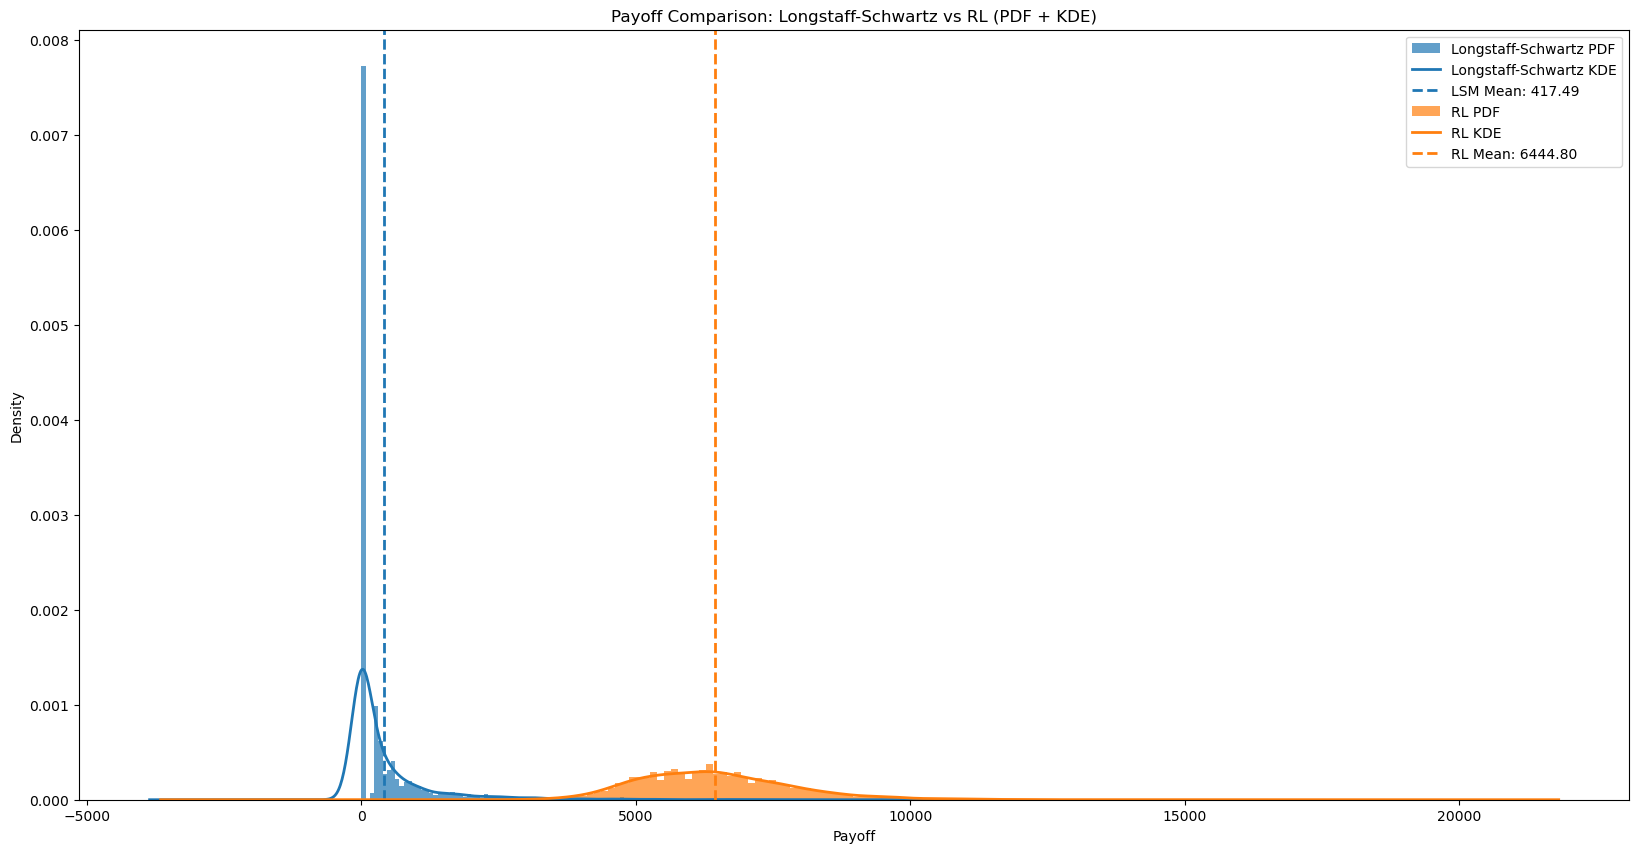

Longstaff-Schwartz Mean Payoff: 417.49
RL Mean Payoff: 6444.80


In [7]:
# for the LSM 
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/Yearly_Swing/evaluation_runs/longstaff_schwartz_solution.csv')

# Get the payoff data
lsm_payoffs = lsm.groupby('episode_idx')['reward'].sum()

# Create the plot with PDF (density=True) and KDE
fig, ax = plt.subplots(figsize=(20, 10))

# Plot histogram as PDF for LSM
ax.hist(lsm_payoffs, bins=100, density=True, alpha=0.7, color='tab:blue', label='Longstaff-Schwartz PDF')

# Add KDE for LSM
lsm_payoffs.plot.kde(ax=ax, color='tab:blue', linewidth=2, linestyle='-', label='Longstaff-Schwartz KDE')

# Add vertical line for LSM mean
lsm_mean = lsm_payoffs.mean()
ax.axvline(lsm_mean, color='tab:blue', linestyle='--', linewidth=2, label=f'LSM Mean: {lsm_mean:.2f}')

# for the RL
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/Yearly_Swing/evaluation_runs/eval_run_8192.csv')

# Get the payoff data
rl_payoffs = rl.groupby('episode_idx')['reward'].sum()

# Plot histogram as PDF for RL
ax.hist(rl_payoffs, bins=100, density=True, alpha=0.7, color='tab:orange', label='RL PDF')

# Add KDE for RL
rl_payoffs.plot.kde(ax=ax, color='tab:orange', linewidth=2, linestyle='-', label='RL KDE')

# Add vertical line for RL mean
rl_mean = rl_payoffs.mean()
ax.axvline(rl_mean, color='tab:orange', linestyle='--', linewidth=2, label=f'RL Mean: {rl_mean:.2f}')

plt.title('Payoff Comparison: Longstaff-Schwartz vs RL (PDF + KDE)')
plt.legend()
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.show()

# Print the mean of each method
print(f"Longstaff-Schwartz Mean Payoff: {lsm_mean:.2f}")
print(f"RL Mean Payoff: {rl_mean:.2f}")


In [8]:
lsm.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,2048.0,2048.000000,2048.000000,2048.000000,2048.0,2048.000000,2048.000000,2048.000000
mean,5050.0,7607.767827,10088.251953,11.748047,50.5,1.167480,1.167480,417.488146
std,0.0,1598.260297,24.650840,24.650840,0.0,2.320398,2.320398,855.434550
min,5050.0,3704.801600,9789.000000,0.000000,50.5,0.000000,0.000000,0.000000
25%,5050.0,6474.354650,10088.000000,0.000000,50.5,0.000000,0.000000,0.000000
50%,5050.0,7437.426750,10100.000000,0.000000,50.5,0.000000,0.000000,0.000000
75%,5050.0,8598.499925,10100.000000,12.000000,50.5,1.000000,1.000000,489.543096
max,5050.0,14852.133100,10100.000000,311.000000,50.5,21.000000,21.000000,7712.907220


In [9]:
rl.groupby('episode_idx').sum().describe()

,step,spot,q_remain,q_exerc,time_left,action,q_actual,reward
count,2048.0,2048.000000,2048.000000,2048.000000,2048.0,2048.000000,2048.000000,2048.000000
mean,4950.0,7422.246930,5641.343773,4358.656223,50.5,88.038274,88.038270,6444.799176
std,0.0,1586.838172,97.329461,97.329463,0.0,1.737499,1.737502,1407.735098
min,4950.0,3343.647100,5356.738300,3981.202800,50.5,81.829941,81.829600,2710.355678
25%,4950.0,6294.843375,5572.013700,4296.162000,50.5,86.888699,86.888800,5438.700131
50%,4950.0,7263.975150,5640.787850,4359.212250,50.5,88.057094,88.057050,6312.636253
75%,4950.0,8347.827550,5703.838100,4427.986275,50.5,89.243028,89.243400,7264.694477
max,4950.0,16181.551100,6018.797500,4643.261900,50.5,93.922189,93.921900,15441.447244
